# SALES FORECASTING & PERFORMANCE DASHBOARD

## PROJECT OBJECTIVE
The goal of this project is to analyze historical sales data, forecast future sales trends, and provide actionable business insights through an interactive performance dashboard. This helps stakeholders make informed decisions about inventory management, marketing strategies, and revenue optimization by identifying patterns, seasonality, and key performance metrics.

### Importing the Dataset 

In [1]:
import os
print(os.listdir())

['.ipynb_checkpoints', 'analysis.ipynb', 'Sales.zip']


In [2]:
import zipfile
with zipfile.ZipFile("Sales.zip") as zip_ref:
    zip_ref.extractall("Sales")

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df_sales=pd.read_csv("Sales/train.csv")

In [9]:
df=df_sales.copy()

### Understanding the Dataset

In [10]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [11]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

## DATA PRE-PROCESSING

### Handling missing values

In [102]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Year             0
Month            0
Quarter          0
dtype: int64

In [14]:
df=df.drop(columns=["Postal Code"],axis=1)

In [15]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

### Handling Duplicate Values

In [103]:
df.duplicated().sum()

np.int64(0)

### Handling Datatypes of Columns

In [20]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

In [24]:
df["Order Date"]=pd.to_datetime(df["Order Date"],dayfirst=True)

In [25]:
df["Order Date"].dtype

dtype('<M8[ns]')

In [26]:
df["Year"]=df["Order Date"].dt.year

In [27]:
df[["Order Date","Year"]].head()

,Order Date,Year
0,2017-11-08,2017
1,2017-11-08,2017
2,2017-06-12,2017
3,2016-10-11,2016
4,2016-10-11,2016


In [28]:
df["Month"]=df["Order Date"].dt.month

In [29]:
df[["Order Date","Month"]].head()

,Order Date,Month
0,2017-11-08,11
1,2017-11-08,11
2,2017-06-12,6
3,2016-10-11,10
4,2016-10-11,10


## FEATURE ENGINEERING

### Monthly Sales Trend

In [30]:
df["Year"].unique()

array([2017, 2016, 2015, 2018], dtype=int32)

To analyze monthly sales trends, the dataset was grouped by Year and Month, and total Sales were calculated for each month using the groupby() function. Since this operation returns a Series with Year and Month as index levels, the index was reset to convert them back into regular columns. A new Date column was then created by combining the Year and Month values into a proper datetime format (setting the day as 1) to enable accurate time-series visualization. Finally, the dataset was sorted by the Date column to ensure chronological order for plotting and trend analysis.

### Useful Functions in Data Preprocessing

-reset_index(): Resets the index of a DataFrame, converting the current index into a column.
                  Useful after filtering or grouping to clean up row numbering.

-tight_layout(): Adjusts subplot parameters automatically to give a neat layout and prevent overlap of titles, labels, and plots in Matplotlib.

-pd.to_datetime(): Converts a column to datetime format for easier time-based analysis and plotting.

-Using a dict inside pd.to_datetime(): Allows converting multiple columns to datetime at once by specifying.  

In [42]:
monthly_df=(
    df.groupby(["Year","Month"])["Sales"].sum()
)
monthly_df=monthly_df.reset_index()
monthly_df["Date"]=pd.to_datetime(
    dict(
        year=monthly_df["Year"],
        month=monthly_df["Month"],
        day=1
    )
)
monthly_df=monthly_df.sort_values("Date")

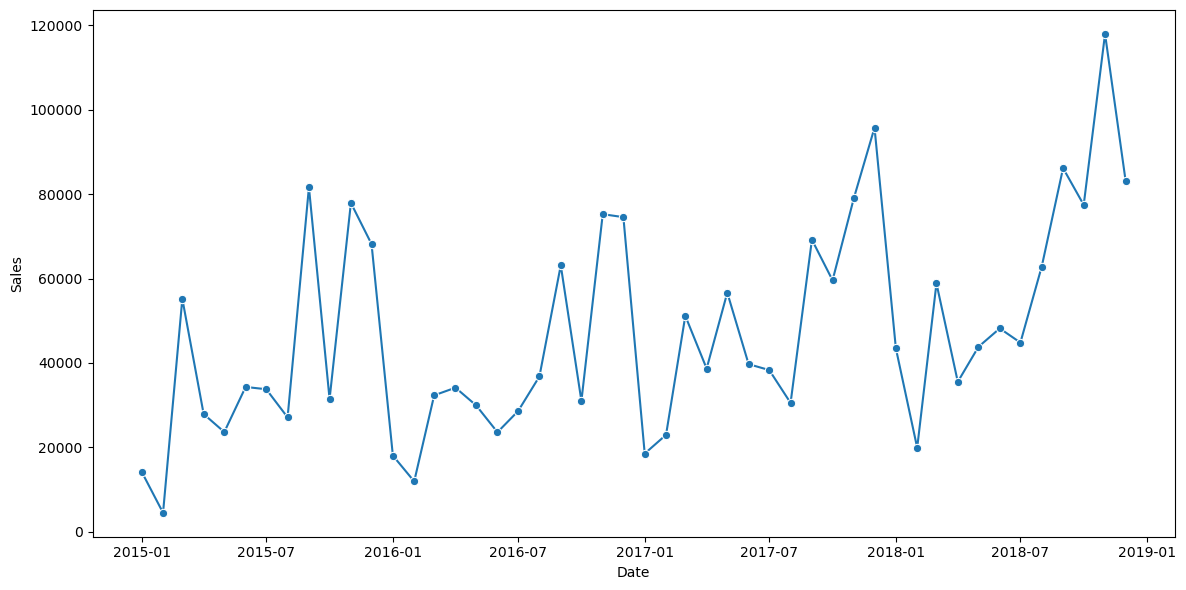

In [45]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=monthly_df,
    x="Date",
    y="Sales",
    marker="o"
)
plt.tight_layout()

### Yearly Sales Analysis

In [47]:
yearly_df=(
    df.groupby("Year")["Sales"].sum()
)
yearly_df=yearly_df.reset_index()
yearly_df["Date"]=pd.to_datetime(
    dict(
        year=yearly_df["Year"],
        month=1,
         day=1
    )
)
yearly_df=yearly_df.sort_values("Date")

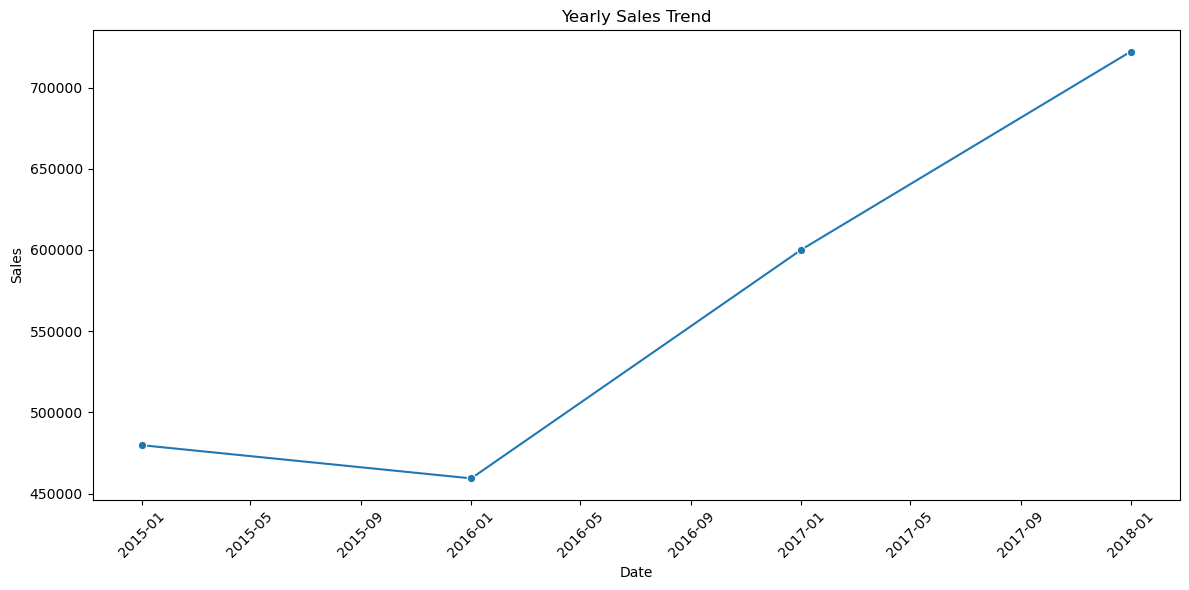

In [51]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=yearly_df,
    x="Date",
    y="Sales",
    marker="o"
)
plt.title("Yearly Sales Trend")
plt.xticks(rotation=45)
plt.tight_layout()

### Seasonality and Peak Performance

In [53]:
df_season=(
    df.groupby("Month")["Sales"].sum()
)
df_season=df_season.reset_index()
df_season["Date"]=pd.to_datetime(
    dict(
        year=2000,
        month=df_season["Month"],
        day=1
    )
)
df_season=df_season.sort_values("Date")

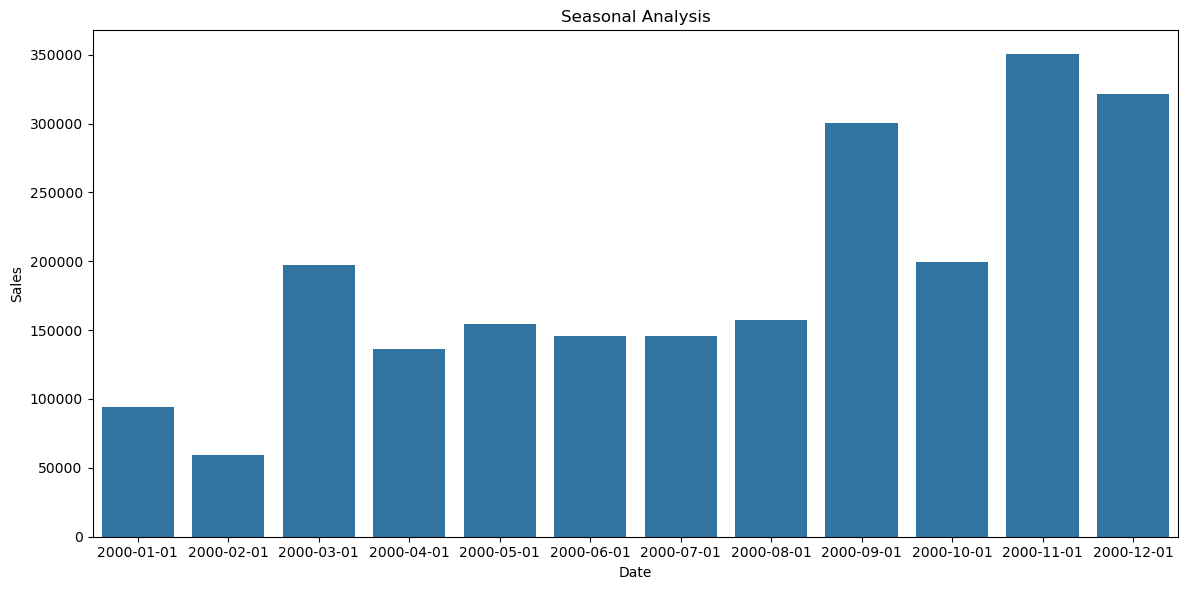

In [55]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=df_season,
    x="Date",
    y="Sales",
)
plt.title("Seasonal Analysis")
plt.tight_layout()


### Quarter Wise Sales Analysis

In [60]:
df["Quarter"]=pd.cut(
    df["Month"],
    bins=[0,3,6,9,12],
    labels=["Q1","Q2","Q3","Q4"]
)
df_quarter=(
    df.groupby("Quarter",observed=False)["Sales"].sum()
)
df_quarter=df_quarter.reset_index()
df_quarter=df_quarter.sort_values(by="Quarter")

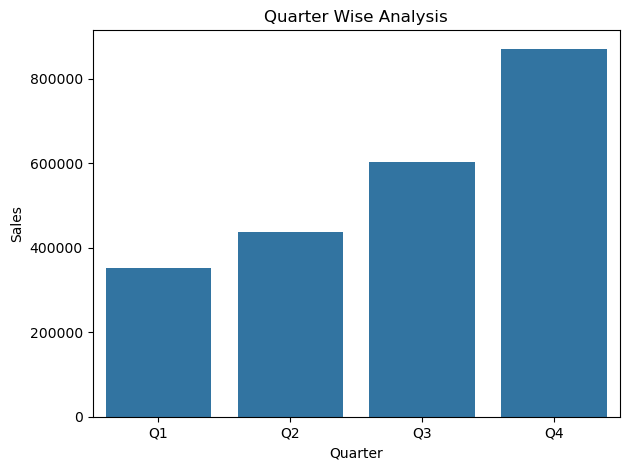

In [61]:
sns.barplot(
    data=df_quarter,
    x="Quarter",
    y="Sales"
)
plt.title("Quarter Wise Analysis")
plt.tight_layout()

### Top Categories

In [63]:
df["Category"].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [66]:
df_category=(
    df.groupby("Category")["Sales"].sum()
)

df_category=df_category.reset_index()
df_category=df_category.sort_values("Sales",ascending=False)

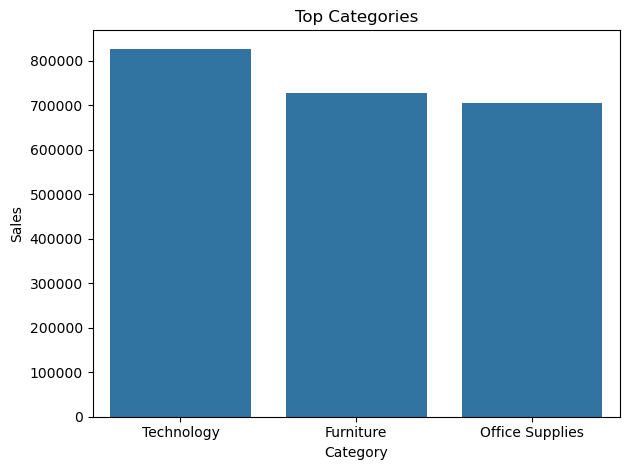

In [67]:
sns.barplot(
    data=df_category,
    x="Category",
    y="Sales"
)
plt.title("Top Categories")
plt.tight_layout()

### Top Sub-Categories

In [68]:
df["Sub-Category"].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [69]:
df_sub=(
    df.groupby("Sub-Category")["Sales"].sum()
)
df_sub=df_sub.reset_index()
df_sub=df_sub.sort_values("Sales",ascending=False)

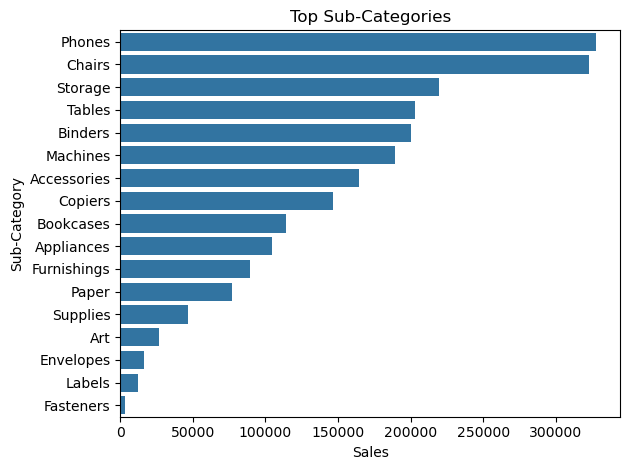

In [70]:
sns.barplot(
    data=df_sub,
    x="Sales",
    y="Sub-Category"
)
plt.title("Top Sub-Categories")
plt.tight_layout()

### Top Products

In [73]:
df["Product Name"].unique()

array(['Bush Somerset Collection Bookcase',
       'Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back',
       'Self-Adhesive Address Labels for Typewriters by Universal', ...,
       'Cisco 8961 IP Phone Charcoal', 'Eureka Hand Vacuum, Bagless',
       'LG G2'], shape=(1849,), dtype=object)

In [82]:
df_product=(
    df.groupby("Product Name")["Sales"].sum()
)
df_product=df_product.reset_index()
df_product=df_product.sort_values("Sales",ascending=False)

top_5_products=df_product.head(5).copy()

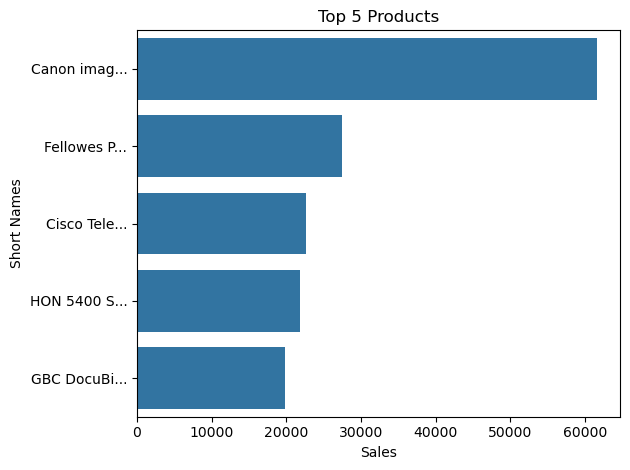

In [84]:
top_5_products["Short Names"]=top_5_products["Product Name"].str[:10]+"..."
sns.barplot(
    data=top_5_products,
    x="Sales",
    y="Short Names"
)
plt.title("Top 5 Products")
plt.tight_layout()

### Regional Analysis

In [85]:
df["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [86]:
df_region=(
    df.groupby("Region")["Sales"].sum()
)
df_region=df_region.reset_index()
df_region=df_region.sort_values("Sales",ascending=False)

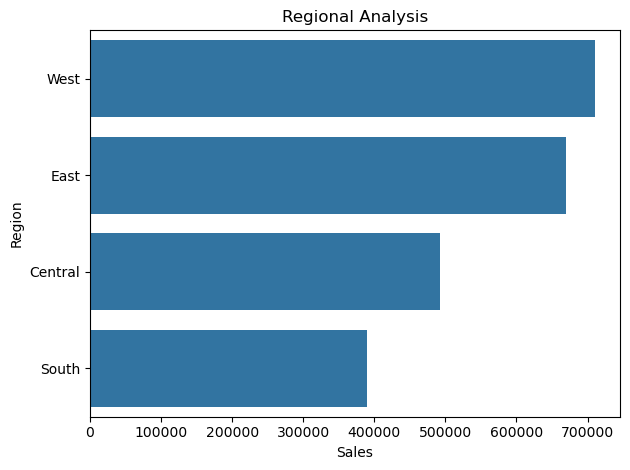

In [87]:
sns.barplot(
    data=df_region,
    x="Sales",
    y="Region"
)
plt.title("Regional Analysis")
plt.tight_layout()

### Country Analysis

In [94]:
df["Country"].unique()

array(['United States'], dtype=object)

### State Analysis

In [88]:
df["State"].unique()

array(['Kentucky', 'California', 'Florida', 'North Carolina',
       'Washington', 'Texas', 'Wisconsin', 'Utah', 'Nebraska',
       'Pennsylvania', 'Illinois', 'Minnesota', 'Michigan', 'Delaware',
       'Indiana', 'New York', 'Arizona', 'Virginia', 'Tennessee',
       'Alabama', 'South Carolina', 'Oregon', 'Colorado', 'Iowa', 'Ohio',
       'Missouri', 'Oklahoma', 'New Mexico', 'Louisiana', 'Connecticut',
       'New Jersey', 'Massachusetts', 'Georgia', 'Nevada', 'Rhode Island',
       'Mississippi', 'Arkansas', 'Montana', 'New Hampshire', 'Maryland',
       'District of Columbia', 'Kansas', 'Vermont', 'Maine',
       'South Dakota', 'Idaho', 'North Dakota', 'Wyoming',
       'West Virginia'], dtype=object)

In [89]:
df_state=(
    df.groupby("State")["Sales"].sum()
)
df_state=df_state.reset_index()
df_state=df_state.sort_values("Sales",ascending=False)

top_5_states=df_state.head(5).copy()

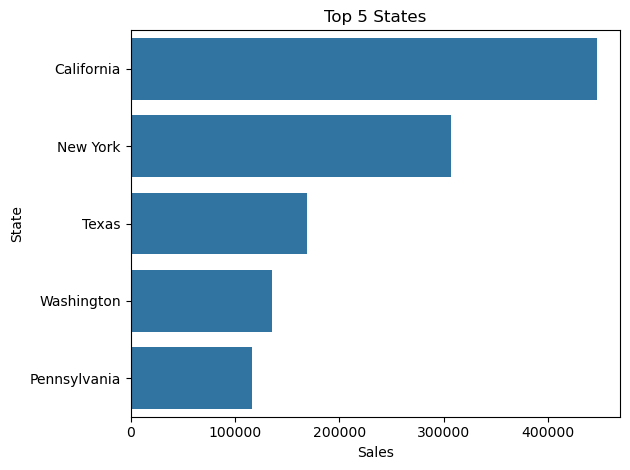

In [90]:
sns.barplot(
    data=top_5_states,
    x="Sales",
    y="State"
)
plt.title("Top 5 States")
plt.tight_layout()

### City Analysis

In [91]:
df["City"].unique()

array(['Henderson', 'Los Angeles', 'Fort Lauderdale', 'Concord',
       'Seattle', 'Fort Worth', 'Madison', 'West Jordan', 'San Francisco',
       'Fremont', 'Philadelphia', 'Orem', 'Houston', 'Richardson',
       'Naperville', 'Melbourne', 'Eagan', 'Westland', 'Dover',
       'New Albany', 'New York City', 'Troy', 'Chicago', 'Gilbert',
       'Springfield', 'Jackson', 'Memphis', 'Decatur', 'Durham',
       'Columbia', 'Rochester', 'Minneapolis', 'Portland', 'Saint Paul',
       'Aurora', 'Charlotte', 'Orland Park', 'Urbandale', 'Columbus',
       'Bristol', 'Wilmington', 'Bloomington', 'Phoenix', 'Roseville',
       'Independence', 'Pasadena', 'Newark', 'Franklin', 'Scottsdale',
       'San Jose', 'Edmond', 'Carlsbad', 'San Antonio', 'Monroe',
       'Fairfield', 'Grand Prairie', 'Redlands', 'Hamilton', 'Westfield',
       'Akron', 'Denver', 'Dallas', 'Whittier', 'Saginaw', 'Medina',
       'Dublin', 'Detroit', 'Tampa', 'Santa Clara', 'Lakeville',
       'San Diego', 'Brentwood', 'Cha

In [92]:
df_city=(
    df.groupby("City")["Sales"].sum()
)
df_city=df_city.reset_index()
df_city=df_city.sort_values("Sales",ascending=False)

top_5_cities=df_city.head(5).copy()

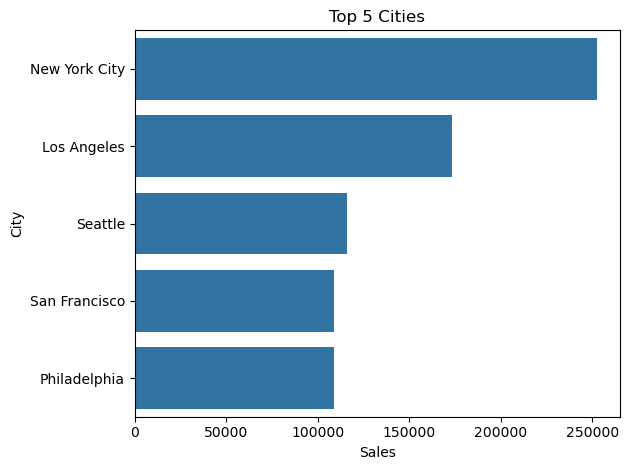

In [93]:
sns.barplot(
    data=top_5_cities,
    x="Sales",
    y="City"
)
plt.title("Top 5 Cities")
plt.tight_layout()

### Customer Analysis

In [97]:
df["Customer Name"].unique()

array(['Claire Gute', 'Darrin Van Huff', "Sean O'Donnell",
       'Brosina Hoffman', 'Andrew Allen', 'Irene Maddox', 'Harold Pawlan',
       'Pete Kriz', 'Alejandro Grove', 'Zuschuss Donatelli', 'Ken Black',
       'Sandra Flanagan', 'Emily Burns', 'Eric Hoffmann',
       'Tracy Blumstein', 'Matt Abelman', 'Gene Hale', 'Steve Nguyen',
       'Linda Cazamias', 'Ruben Ausman', 'Erin Smith', 'Odella Nelson',
       "Patrick O'Donnell", 'Lena Hernandez', 'Darren Powers',
       'Janet Molinari', 'Ted Butterfield', 'Kunst Miller',
       'Paul Stevenson', 'Brendan Sweed', 'Karen Daniels',
       'Henry MacAllister', 'Joel Eaton', 'Ken Brennan',
       'Stewart Carmichael', 'Duane Noonan', 'Julie Creighton',
       'Christopher Schild', 'Paul Gonzalez', 'Gary Mitchum', 'Jim Sink',
       'Karl Braun', 'Roger Barcio', 'Parhena Norris', 'Katherine Ducich',
       'Elpida Rittenbach', 'Rick Bensley', 'Gary Zandusky',
       'Lena Cacioppo', 'Janet Martin', 'Pete Armstrong', 'Cynthia Voltz',
   

In [100]:
df_customer=(
    df.groupby("Customer Name")["Sales"].sum()
)
df_customer=df_customer.reset_index()
df_customer=df_customer.sort_values("Sales",ascending=False)

top_10_customer=df_customer.head(10).copy()

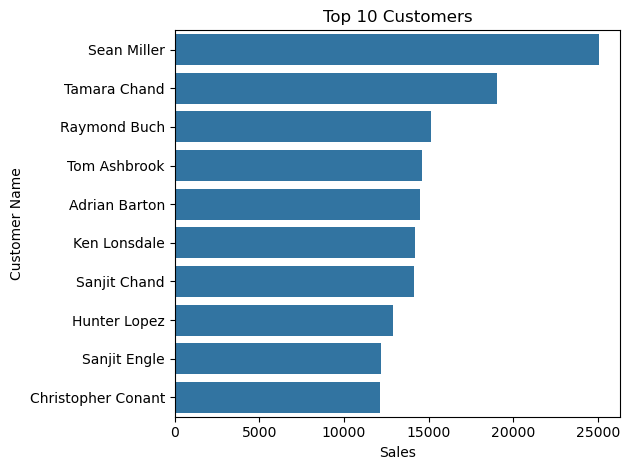

In [101]:
sns.barplot(
    data=top_10_customer,
    x="Sales",
    y="Customer Name"
)
plt.title("Top 10 Customers")
plt.tight_layout()